
This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

In [1]:
print("hello")

hello


# Lecture 03. Linear regression
## Problem of Linear regression

**Supervised learning**

Given the right answer for each example in the data

![Sample dataset](https://github.com/ulstu/ml/blob/master/img/lec03_sample_dataset.png?raw=1)
    
**Regression problem**

Predict real value output

**Notation**
* m = number of training examples
* n = number of features
* x’s = input variables / features
* y’s = output variables / “target” variable
* (x, y): training example

## Learning model (hypothesis)

![Learning algorythm](https://github.com/ulstu/ml/blob/master/img/learning_algorythm.png?raw=1)

In [45]:
!pip install --upgrade IPython
!pip install git+https://github.com/jakevdp/JSAnimation.git

  Cloning https://github.com/jakevdp/JSAnimation.git to /private/var/folders/97/qzq48s051vg6l5_cc1kg8bhw0000gn/T/pip-req-build-frfn8aer
  Running command git clone --filter=blob:none -q https://github.com/jakevdp/JSAnimation.git /private/var/folders/97/qzq48s051vg6l5_cc1kg8bhw0000gn/T/pip-req-build-frfn8aer
  Resolved https://github.com/jakevdp/JSAnimation.git to commit d290db11ebb5427769b76fc532f2d10c4ea3391f
  Preparing metadata (setup.py) ... done


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import matplotlib
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from JSAnimation import IPython_display
import sklearn.datasets as ds
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import Video
%matplotlib inline
matplotlib.style.use('ggplot')
warnings.filterwarnings("ignore")


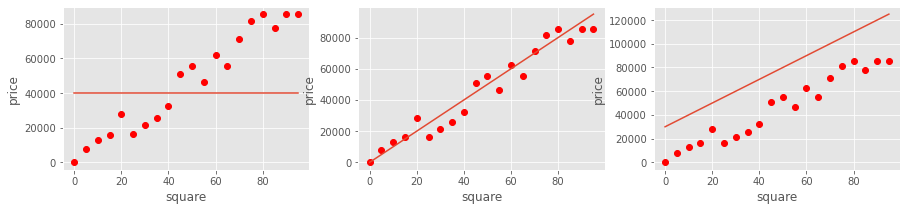

In [2]:

def rand_price(x):
    return (x * 1000 + random.randint(-10000, 10000))
# y = 1000 * x + 0

squares = list(range(0, 100, 5))
prices = [rand_price(i) for i in squares]

plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.plot(squares, prices, "ro", squares, [0 * x + 40000 for x in squares])
plt.ylabel('price')
plt.xlabel('square')
plt.subplot(132)
plt.plot(squares, prices, "ro", squares, [1000 * x for x in squares])
plt.ylabel('price')
plt.xlabel('square')
plt.subplot(133)
plt.plot(squares, prices, "ro", squares, [1000 * x + 30000 for x in squares])
plt.ylabel('price')
plt.xlabel('square')
plt.show()

## How to find a function?
### Classical approach: normal equation
$W=(X^T X)^{-1} X^T y$

### What if we have a lot of data?
Hypothesis:
$h(x)=w_0 x_0 + w_1 x_1$


<b>Idea: chose $w_0, w_1$ so that $h_w(x)$ is close to $y$ for our training examples $(x, y)$</b>
    
$J(w)=\frac{1}{2} \sum_{i=1}^m (h_{w}(x^{(i)}) - y^{(i)})^2$ - mean squared error function (MSE)

$J'(w)= \sum_{i=1}^m (h_{w}(x^{(i)}) - y^{(i)})x^{(i)}$


$h(x) = \sum_{i=0}^n w_i x_i = W^T X$

In [67]:
def calc_errors(weights, need_print = True):
    errors = []
    w_1s = []
    w_0s = []
    h_xs = []
    for w in weights:
        h_x = [(w['w_1'] * x + w['w_0']) for x in squares]
        mse = np.square(np.subtract(h_x, prices)).sum() / 2
        h_xs.append(h_x)
        errors.append(mse)
        w_1s.append(w['w_1'])
        w_0s.append(w['w_0'])
        if need_print:
            print("w_o:{}; w_1: {}; mse; {}".format(w['w_0'], w['w_1'], mse))

    return errors, h_xs, w_0s, w_1s


w_o:0; w_1: 0; mse; 32549124369.5
w_o:0; w_1: 200; mse; 21160019369.5
w_o:0; w_1: 500; mse; 8707611869.5
w_o:0; w_1: 1000; mse; 303599369.5
w_o:0; w_1: 1300; mse; 2671191869.5
w_o:0; w_1: 1500; mse; 7337086869.5
w_o:0; w_1: 1600; mse; 10596284369.5
w_o:0; w_1: 2000; mse; 29808074369.5


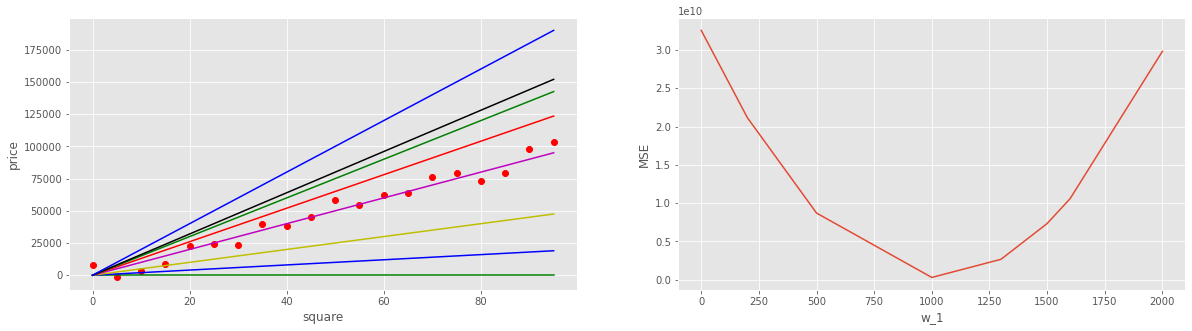

In [68]:
weights = []
weights.append({'w_0': 0, 'w_1': 0})
weights.append({'w_0': 0, 'w_1': 200})
weights.append({'w_0': 0, 'w_1': 500})
weights.append({'w_0': 0, 'w_1': 1000})
weights.append({'w_0': 0, 'w_1': 1300})
weights.append({'w_0': 0, 'w_1': 1500})
weights.append({'w_0': 0, 'w_1': 1600})
weights.append({'w_0': 0, 'w_1': 2000})

errors, h_xs, w_0s, w_1s = calc_errors(weights)
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(squares, prices, "ro", squares, h_xs[0], "g", squares, h_xs[1], "b", squares, h_xs[2], "y", squares, h_xs[3], "m", squares, h_xs[4], "r", squares, h_xs[5], "g", squares, h_xs[6], "k", squares, h_xs[7], "b")
plt.xlabel('square')
plt.ylabel('price')

plt.subplot(122)
plt.plot(w_1s, errors)
plt.xlabel('w_1')
plt.ylabel('MSE')
plt.show()

## How to find right values for Weights?
![Image of error](https://github.com/ulstu/ml/blob/master/img/gd_ann.png?raw=1)

## What if we have 2 weights?

<Figure size 720x360 with 0 Axes>

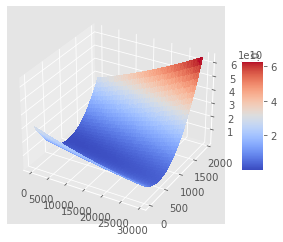

In [50]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

weights = []
for i in range(0, 2000, 50):
    for j in range(0, 30000, 500):
        weights.append({'w_0': j, 'w_1': i})
errors, h_xs, w_0s, w_1s = calc_errors(weights, False)

plt.figure(figsize=(10, 5))
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_trisurf(np.array(w_0s), np.array(w_1s), np.array(errors), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


![](https://github.com/ulstu/ml/blob/master/img/lec03_3dgradient.png?raw=1)

## Gradient descent

Have some function $J(W_1, W2)$

Want to $min_{W_1, W_2} J(W_1, W_2)$

**Outline**:
* Start with some $W_1, W_2$ (for example $0, 0$)
* Keep changing $W_1, W_2$ to reduce $J(W_1, W_2)$ until we hopefully end up at a minimum

![](https://github.com/ulstu/ml/blob/master/img/lec03_3dgradient_way.png?raw=1)
![](https://github.com/ulstu/ml/blob/master/img/lec03_3dgradient_way2.png?raw=1)


## Gradient descent algorythm

**Repeat until convergence**:
$W_j = W_j - \alpha \frac{\partial}{\partial W_j} J(W_0, W_1)$ for $j = 0$ and $j = 1$

**Correct: simultaneous update**
* $temp0 = W_0 - \alpha \frac{\partial}{\partial W_0} J(W_0, W_1)$
* $temp1 = W_1 - \alpha \frac{\partial}{\partial W_1} J(W_0, W_1)$
* $W_0 = temp0$
* $W_1 = temp1$

**Incorrect:**
* $temp0 = W_0 - \alpha \frac{\partial}{\partial W_0} J(W_0, W_1)$
* $W_0 = temp0$
* $temp1 = W_1 - \alpha \frac{\partial}{\partial W_1} J(W_0, W_1)$
* $W_1 = temp1$

**$\alpha$ - learning rate, $\frac{\partial}{\partial W_j} J(W_0, W_1)$ - partial derivative**

![](https://github.com/ulstu/ml/blob/master/img/lec03_derivative.png?raw=1)

**Chosing $\alpha$:**
* if $\alpha$ is too small, gradient descent  can be slow
* if $\alpha$ is too large, gradient descent can overshot the minimum. It may fail to converge, or even diverge

![](https://github.com/ulstu/ml/blob/master/img/lec03_alpha.png?raw=1)


**Gradient descent can converge to a local minimum, even with the learning rate $\alpha$ fixed**. 

It will automatically take smaller steps. So, no need to descrease $\alpha$ over time.

![](https://github.com/ulstu/ml/blob/master/img/lec03_alpha_decrease.png?raw=1)

![](https://github.com/ulstu/ml/blob/master/img/lec03_converge.gif?raw=1)

**Batch gradient descent**: each step of a gradient descent uses all the training examples!

![](https://github.com/ulstu/ml/blob/master/img/lec03_bgd.png?raw=1) ![](https://github.com/ulstu/ml/blob/master/img/lec03_sgd.png?raw=1)


# Gradient Descent
The idea of Gradient Descent is to change $x$ by small value in the direction of the gradient. Consider some quadratic function, for example, 
$$
f(x) = x^2 - 6x + 5
$$

Local minimum occurs at 3.05.


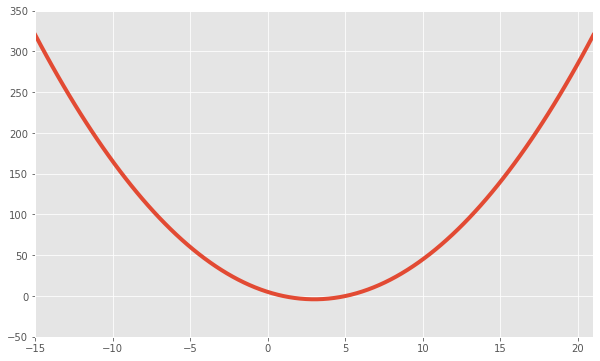

In [51]:
# functions for animation
def init():
    line.set_data([], [])
    return line,

def animate(i):
    x_n = mins[0::10][i]
    y_n = x_n**2-6*x_n+5
    line.set_data(x_n, y_n)
    return line,

# function we want to optimize
def f(x):
    return x**2 - 6*x + 5

# derivative of the optimized function
def f_derivative(x):
    return 2*x -6

x = np.linspace(-15,21,100)  #x values
y = f(x)                     #function values
old_min = 0                  #previous minimum
temp_min = 15                #current minimum
step_size = 0.01             #learning rate
precision = 0.001            #stopping criteria
 
mins = [] #array for minima
cost = [] #array for errors
steps_num = 0
while abs(temp_min - old_min) > precision or steps_num > 1000:
    steps_num += 1
    old_min = temp_min 
    gradient = f_derivative(old_min) 
    move = gradient * step_size
    temp_min = old_min - move
    # we calculate an error because we know the actual minimum
    cost.append((3-temp_min)**2) 
    mins.append(temp_min)
print("Local minimum occurs at {}.".format(round(temp_min,2)))

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(xlim=(-15, 21), ylim=(-50, 350))
ax.plot(x, y, linewidth=4)
line, = ax.plot([], [], "D", markersize=12)

a = animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(mins[0::10]), interval=200)
#a.save('gd.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

Video("gd.mp4", embed=True)

Unfortunately, if the function has many extrema, then the Gradient Descent could find the local minimum instead of global minimum. One trick is to overcome this disadvantage is to run SGD several times with different initial guessed values for $x$. Here is an example of function where Gradient Descent could be not effective:

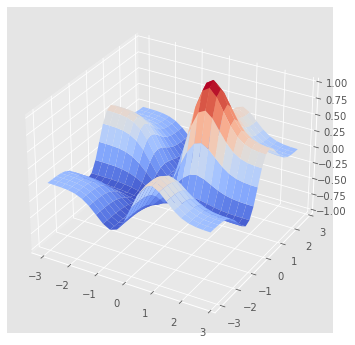

In [52]:
def f(a,b):
    return 2*a*b*np.exp(-a**2 - b**2) + a*np.exp(-a**2) + b*np.exp(-b**2)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

a = np.arange(-3, 3, 0.25)
b = np.arange(-3, 3, 0.25)
a, b = np.meshgrid(a, b)
c = f(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True)
ax.set_zlim(-1.01, 1.01)

plt.show()

# Gradient Descent for Linear Regression (one feature)
For the linear regression we consider the cost function 
$$
J(W) = \dfrac{1}{2} \sum\limits_{i=1}^{m} (h_{W} (x^{(i)}) - y^{(i)})^2.
$$ 
For one feature problem this function becomes two variable function, because we need to add the bias term to the set of features. We complete this step by adding the column of 1's to the matrix $X$.

In [53]:
X_train,y_train = ds.make_regression(n_samples=100, 
                                     n_features=1, 
                                     n_informative=1, 
                                     noise=20.0, 
                                     bias=50, 
                                     random_state=2016)
y_train = y_train/10 # scale target to have nicer pictures

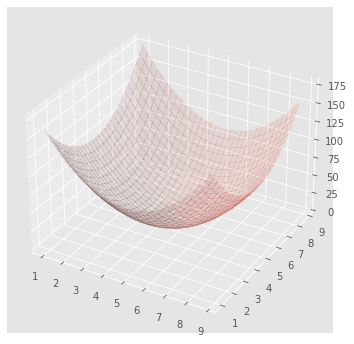

In [54]:
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]

def cost_function(x, y, theta):
    y = y.reshape((-1,1))
    theta = np.array(theta).reshape((2,-1))
    return np.sum((np.dot(x, theta) - y) ** 2, axis=0)/(2*10)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
a = np.arange(1, 9, 0.25)
b = np.arange(1, 9, 0.25)
a, b = np.meshgrid(a, b) # make a grid of values from a and b
# we use some vectorization to speed up the calculations
c = cost_function(X_train_bias, y_train, np.c_[a.ravel(), b.ravel()].T).reshape(a.shape)

surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.1, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 180.01)

plt.show()

To compare the Batch and Stochastic Gradient Descents we will implement it separately.

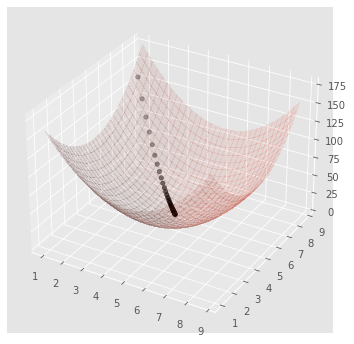

In [55]:
def batch_gradient_descent(x, y, theta0, iters, alpha):
    theta = theta0    # initial values for theta's
    history = []      # array of theta's    
    costs = []        # array of costs
    # main loop by number of iterations:
    for i in range(iters):
        history.append(theta)
        cost = cost_function(x, y, theta)[0]
        costs.append(cost)
        pred = np.dot(x, theta)
        error = pred - y 
        gradient = x.T.dot(error)
        theta = theta - alpha * gradient  # update
    return history, costs

history, costs = batch_gradient_descent(X_train_bias, y_train, 
                                        theta0 = [1.2, 8], 
                                        iters = 30, 
                                        alpha = 0.001)
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.1, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 180.01)

t0 = np.array([x[0] for x in history])
t1 = np.array([x[1] for x in history])
ax.scatter(t0, t1, costs, color="k"); 

plt.show()

As you can see, the algorithm found the fastest path to the minimum. Stochastic Gradient Descent does not find the shortest path, but in most cases it is much faster because it does not use all training examples to update the parameters:

When we apply the Gradient Descent algorithm to the linear regression our straight line gradually approaching to the line which fits our data in the best way. We apply the above method ```batch_gradient_descent``` to fit the coefficients in the linear regression.

In [56]:
alpha = 0.001             # learning rate
iters = 100               # number of iterations
theta = np.random.rand(2) # initial guess for theta's
history, cost = batch_gradient_descent(X_train_bias, y_train, theta, iters, alpha)
theta = history[-1]
print("Parameters thetas after gradient descent: " + ", ".join([str(round(x,2)) for x in theta]))
best_fit_gradient_descent = theta[0] + X_train[:,0] * theta[1]

Parameters thetas after gradient descent: 4.98, 4.82


Notice that the parameters from the manual implementation are very close to the parameters from ```scikit-learn```. The animated plot how the Gradient Descent for the linear regression works:

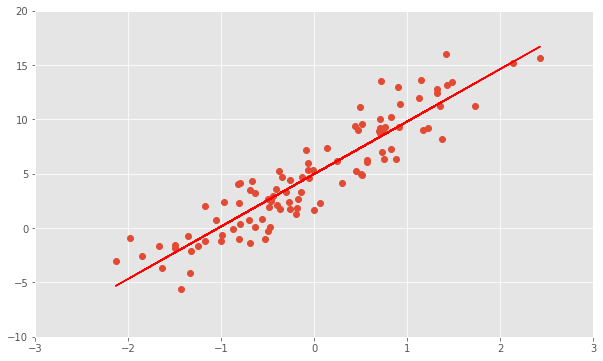

In [57]:
# functions for animation
def init():
    line.set_data([], [])
    return line,

def animate(i):
    w = history[i].reshape((-1,1))
    line.set_data(X_train[:, 0], np.dot(X_train_bias, w))
    return line,

fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 3), ylim=(-10, 20))
ax.plot(X_train[:,0], y_train, 'o')
line, = ax.plot([], [], lw=2)

plt.plot(X_train[:,0], best_fit_gradient_descent, 'k-', color = "r")



## How to use Linear Regression in simple way?

In [69]:
X_train,y_train = ds.make_regression(n_samples=100, 
                                     n_features=1, 
                                     n_informative=1, 
                                     noise=20.0, 
                                     bias=50, 
                                     random_state=2016)
y_train = y_train/10 # scale target to have nicer pictures

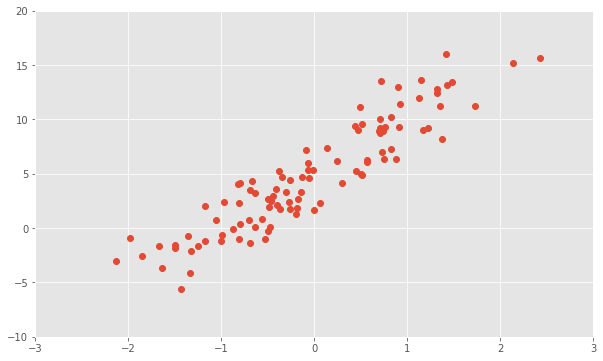

In [70]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 3), ylim=(-10, 20))
ax.plot(X_train[:,0],y_train,'o')
plt.show()

Now we build our first model using the method ```LinearRegression``` from the package ```scikit-learn```. Notice that when you work with ```scikit-learn``` training different models is very similar. Usually, training contains the following steps:
1. Create a class for the model and define all parameters
2. Use the method fit to train the model on the training examples
3. Use the method predict or predict\_proba to obtain predictions on the test examples.

In our example we do not have any test examples, that is why we train the linear regression model and obtain the coefficients from our model.

In [60]:
model = LinearRegression() # create an object of the LinearRegression class

model.fit(X_train,y_train) # train the model on the training examples
best_fit = model.predict(X_train)
intercept = model.intercept_
slope = model.coef_[0]
best_fit = X_train[:,0] * slope + intercept
print ("Parameters thetas: " + str(round(model.intercept_,2)) + ", " + ", ".join([str(round(x,2)) for x in model.coef_]))

Parameters thetas: 4.98, 4.83


In [72]:
from sklearn.metrics import r2_score 
r2 = r2_score(y_train, best_fit)
print(r2)

0.8474644632963643


Finally, we visualize our data along with the regression line.

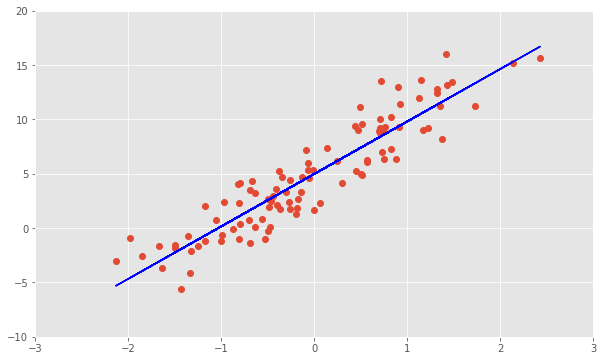

In [73]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 3), ylim=(-10, 20))
ax.plot(X_train[:,0],y_train,'o')
line, = ax.plot([], [], lw=2)
plt.plot(X_train[:,0], best_fit, 'k-', color = "b")
plt.show()

# Feature scaling

Make sure features are on a similar scale, approximately $-1 < x_i < 1$

$x_i = \frac{x_i - \mu}{\sigma}$, where

* $\mu$ is the mean (average)
* $\sigma$ is the standard deviation from the mean


<sub>examples: http://benalexkeen.com/feature-scaling-with-scikit-learn/<sub>

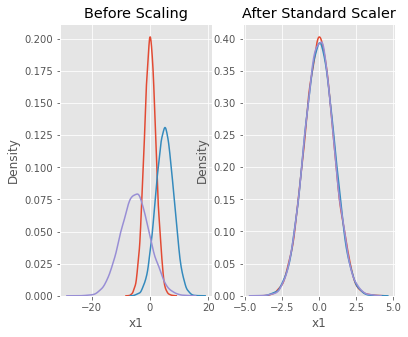

In [63]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

## Min-Max Scaler

$x_i = \frac{x_i - min(x)}{max(x) - min(x)}$

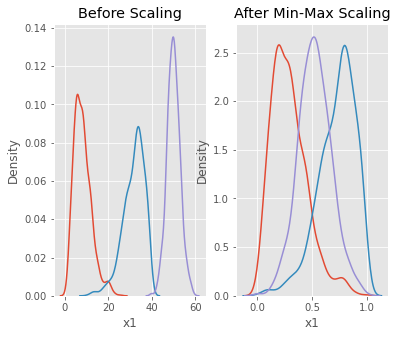

In [64]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()